# Using data analysis to interpret speed of light measurements

In this notebook, we will investigate some of the ways in which the speed of light has been measured throughout history. The speed of light is an incredibly important value as it is the basis of many fields of physics, for example Maxwell’s electromagnetism, and Einstein’s relativity. In this notebook, we will be considering the speed of light in a vacuum, which is almost exactly the same as the speed of light in air (in air, light is 1.0003 times slower). The two main methods we will consider are Foucalt’s method using a simple time of flight technique, and the method in which the frequency and the wavelength of light is measured, and then used to calculate the speed of light using 

![](../media/pins%206.png)

In [ ]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

The information in this notebook is partially based on the article by R. J. MacKay and R. W. Oldford, *Scientific Method, Statistical Method and the Speed of Light*, Statistical Science, 2000, 15:3, pp. 254–278, and successive measurements of the speed of light by S. Prokhovnik and W. Morris, *A review of speed of light measurements since 1676*, CEN Tech. J. 1993, 7:2, pp. 181–183. 

Perhaps the most obvious way to measure the speed of light is to simply measure the time taken for light to travel a certain distance, and then use speed = distance/time. This is the basis behind the Fizeau-Foucalt method, which was developed and perfected by Hippolyte Fizeau and Leon Foucalt in the late 19th century and the early 20th century. Fizeau's method involved passing the beam though the (More details about cogwheel apparatus + animation). 

In 1879, A. Michelson was working as a physics instructor in Annapolis, when he was ordered to investigate the speed of light based off of Foucault’s  most recent measurement. He repeated Foucault’s rotating mirror method, but increased the path length from about 66 feet to 200 feet (roughly 20 metres to 61 metres). He also managed to get his mirror spinning at 256 rotations per second, quite an incredible feat for his time, using a combination of compressed air, tuning forks, and more mirrors. There were of course, plenty of environmental factors to consider, temperature fluctuations, the refractive index of the atmosphere, etc. However Michelson accounted for them all. 

Below you can see the results that Michelson recorded in the form of a bar graph, lets perform some analysis on this data

In [ ]:
mich = pandas.read_csv("https://risk-engineering.org/static/data/michelson-speed-light.csv")
mich.rename(columns={"velocity of light in air (km/s)": "speed"}, inplace=True)
mich.head()

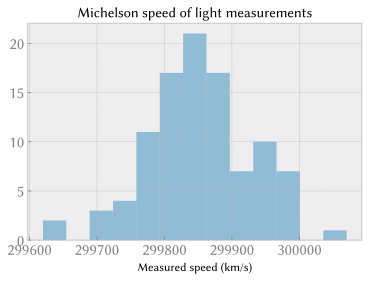

In [ ]:
plt.xlabel("Measured speed (km/s)")
plt.title("Michelson speed of light measurements")
plt.hist(mich.speed, alpha=0.5);

The mean value from Michelson’s measurements is

In [ ]:
mich.speed.mean()

299852.4

Since there is clearly some measurement uncertainty, we would like to report a **95% confidence interval** for the measurements. We can do this using bootstrap resampling, as implemented in the function below. Bootstrap resampling is where we make our sample size bigger by randomly copying samples from the original data set into a new data set, until we reach the size we want. Then we can estimate the mean and confidence interval of the original data set as the mean and confidence interval of the new data set.

In [ ]:
def bootstrap_confidence_intervals(data, estimator, percentiles, runs=1000):
    replicates = numpy.empty(runs)
    for i in range(runs):
        replicates[i] = estimator(numpy.random.choice(data, len(data), replace=True))
    est = numpy.mean(replicates)
    ci = numpy.percentile(replicates, percentiles)
    return (est, ci)

In [ ]:
est, ci = bootstrap_confidence_intervals(mich.speed, estimator=numpy.mean, percentiles=[2.5, 97.5])
est, ci

(299852.25539999997, array([299837.3975, 299868.8025]))

In [ ]:
est - ci[0], ci[1] - est

(14.857899999944493, 16.54710000002524)

The first value returned is the bootstrapped estimate of the mean, and the second is the 95% confidence interval. Given that the confidence interval is roughly symmetrical, we could report this measurement as

    299853 ± 16 km/s (95% CI) 

or as 

    2998523 [299837, 299869] km/s (95% CI). 

Note that a ± notation without the "(95% CI)" for the margin of error is ambiguous, as is soley an interval, because some scientific communities use one or two standard deviations instead of a confidence interval. 

After accounting for his uncertainties, Michelson’s final measurement for the speed of light in a vacuum was reported as 299944 ± 51 km/s. Despite this, he vehemently stated his measurement was actually correct to approximately ± 150 km/s, in fact the difference between his result and todays accepted value is 148 km/s.

The second method we will consider is a type of interferometry using modulated light. Here, the intensity of the light is varied with time in a sinusoidal manner, thus if we choose the frequency of the light sensibly, we can obtain a measurable wavelength. If two identical sources are the same distance from a detector, they will arrive in phase. If they are a distance Δx apart, then the peaks in one intensity measurement will not necessarily coincide with the peaks in the second.  There is a phase difference between the peaks of the intensity waveforms. The only time they will be in phase is if the distance difference is an integer number of the modulation wavelength of the light. Thus if we can use the detector to measure the phase difference, we have the wavelength as 

![](../media/pins%204.png)


![](../media/pins%201.png)

This means, knowing the modulation frequency, we can work out the speed of light using

![](../media/pins%205.png)

Put together, the apparatus looks something like this: (+animation)

![](../media/pins%202.png)

Data from Discovery skills

Analysis of this data

Criticism of this method (compare to Essen-Gordon-Smith result)

There are of course, other methods used in the past to measure the speed of light, for example the first recorded estimate was made by Ole Christensen Romer in 1676, who used the change in orbital period of Jupiter’s moon Io due to the changing distance between Jupiter and the Earth. When the Earth is approaching Jupiter, the period is shorter, and when receeding, longer. Thus the speed of light can be estimated as the change in period also depends on the time taken for light to reach the Earth.

![](../media/pins%203.png)

In the modern era, the limiting factor in measuring the speed of light became not the uncertainty of experiments, for example in 1972 using laser interferometry, the speed of light was measured as 299792456.2±1.1 m/s. This small remaining uncertainty was caused by the definition of the metre. In order to get around this, the meeting of the General Conference on Weights and Measures (CGPM) redefined the metre as "the length of the path traveled by light in vacuum during a time interval of 1/299792458 of a second." This permanently fixed the speed of light to be exactly 299792458 m/s, so now, further experiments don’t change the definition of the speed of light, but rather the definition of the metre.